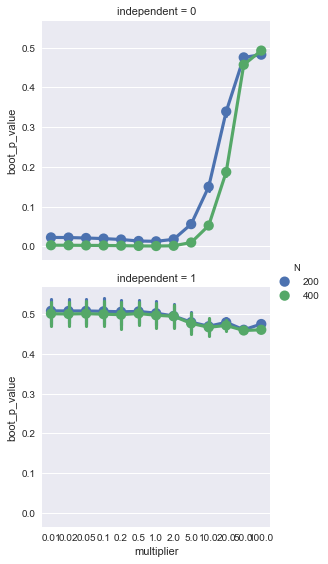

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import expanduser   
df = pd.read_csv(expanduser('~/Dropbox/research/2014 rcm/kcipt-master/results/kcit2_chaotic_varying.csv'),
            names=['multiplier','independent', 'gamma', 'noise', 'trial', 'N', 'runtime', 'statistic', 'boot_p_value', 'appr_p_value'])
sns.set()
sns.factorplot(x='multiplier', y='boot_p_value',hue='N',row='independent', data=df)
plt.show()

In [7]:
from sdcit.utils import K2D, AUPC, KS_statistic

aupcs = {(N, multiplier): AUPC(gdf['boot_p_value'])
             for (N, multiplier), gdf
             in df[df['independent'] == 0].groupby(by=['N', 'multiplier'])}

ks = {(N, multiplier): KS_statistic(gdf['boot_p_value'])
      for (N, multiplier), gdf
      in df[df['independent'] == 1].groupby(by=['N', 'multiplier'])}

all_multipliers = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100]
aupc_200 = np.array([aupcs[(200, mp)] for mp in all_multipliers])
ks_200 = np.array([ks[(200,  mp)] for mp in all_multipliers])
aupc_400 = np.array([aupcs[(400, mp)] for mp in all_multipliers])
ks_400= np.array([ks[(400,  mp)] for mp in all_multipliers])

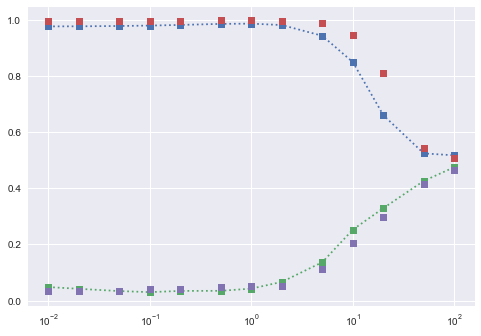

In [9]:
plt.close()
plt.figure()
plt.semilogx(all_multipliers, aupc_200, ':s', label='_nolegend_')
plt.semilogx(all_multipliers, ks_200, ':s', label='_nolegend_')
plt.semilogx(all_multipliers, aupc_400, 's', label='_nolegend_')
plt.semilogx(all_multipliers, ks_400, 's', label='_nolegend_')
plt.show()